In [1]:
import csv
import numpy as np
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap    # for mapping colours to an array of values 
from sklearn import neighbors
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv('H1E_training.csv')
val=pd.read_csv('H1E_validation.csv')
test=pd.read_csv('H1E_test.csv')

hi <class 'matplotlib.collections.PathCollection'>


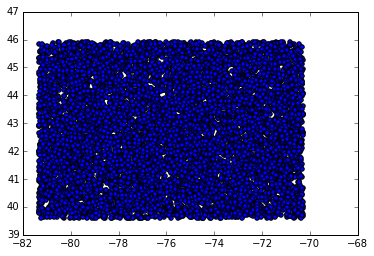

In [3]:
train_long= list(train['Long'])
train_lat=list(train['Lat'])
train_county=list(train['County'])
print 'hi',type(plt.scatter(train_long,train_lat))
plt.figure(figsize=(1500,1500))

In [4]:
X = train.iloc[:, :2]  # If X is numpy array then X = [:, :2]
y  =  train['County'] 
X1= val.iloc[:, :2]
y1=val['County']
X2 = test.iloc[:, :2]  # If X is numpy array then X = [:, :2]
y2  =  test['County'] 
train['dist']=(train['Long']**2+train['Lat']**2)**0.5
val['dist']=(val['Long']**2+val['Lat']**2)**0.5

In [8]:
train.head()

,Long,Lat,County,dist
0,-72.326,45.179,0,85.277150
1,-71.318,42.831,0,83.191055
2,-79.938,41.973,45,90.287411
3,-71.234,45.184,19,84.355655
4,-74.344,41.147,0,84.971207


In [16]:
type(train['dist'])

pandas.core.series.Series

In [21]:
results = []
for n in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=n,weights='distance',algorithm='auto', leaf_size=30, metric='minkowski', p=1, metric_params=None)
    neigh.fit(train.iloc[:,0:2],train['County'])
    Z=neigh.predict(val.iloc[:,0:2])
    accuracy = np.where(Z==val['County'], 1, 0).sum() / float(len(val))
    #acc=neigh.score(test['County'],train['County'])
    
    results.append([n, accuracy])
    
results = pd.DataFrame(results, columns=["n", "accuracy"])
print results

     n  accuracy
0    1  0.663710
1    2  0.665323
2    3  0.729032
3    4  0.770968
4    5  0.787097
5    6  0.795968
6    7  0.806452
7    8  0.808871
8    9  0.812097
9   10  0.814516
10  11  0.820161
11  12  0.820968
12  13  0.829032
13  14  0.828226
14  15  0.831452
15  16  0.837903
16  17  0.833065
17  18  0.837903
18  19  0.836290
19  20  0.841935


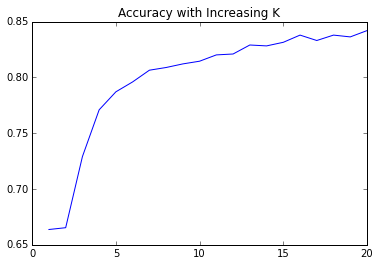

In [6]:
pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()


In [7]:

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X[:1240], val['County']) 

#print(neigh.predict)
#accuracy=neigh.score(X[:1240],val['County'])
Z1=neigh.predict(X1)
print accuracy

0.841935483871


In [8]:
val['Z']=Z1

In [9]:
val.head()

,Long,Lat,County,Z
0,-74.640,42.556,32,20.10
1,-77.767,42.010,42,27.65
2,-77.447,42.207,38,30.70
3,-75.534,44.495,1,27.30
4,-74.270,42.329,45,22.25


In [10]:
neigh = KNeighborsRegressor(n_neighbors=14)
neigh.fit(X2, y2) 

print(neigh.predict(test.iloc[:,0:2]))
accuracy=neigh.score(X2,y2)
print accuracy

[  2.64285714  25.57142857  51.28571429 ...,  14.35714286   2.          33.92857143]
0.975755549046


In [96]:
light_colors =  ListedColormap(['blue', 'c', 'g'])  # 'c' for cyan and 'g' for green
bold_colors  =  ListedColormap(['r', 'k', 'yellow'])    # 'r' for red  and 'k' for black
light_colors.colors

['blue', 'c', 'g']

In [97]:
neigh = neighbors.KNeighborsClassifier()
neigh.fit(X2, y2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [98]:
x_min, x_max = X2.iloc[:, 0].min() - 1, X2.iloc[:, 0].max() + 1
y_min, y_max = X2.iloc[:, 1].min() - 1, X2.iloc[:, 1].max() + 1

In [99]:
h = 0.02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 

In [100]:
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
Z1= neigh.predict(np.c_[xx.flatten(), yy.flatten()])
Z2= neigh.predict(np.c_[xx.reshape(len(xx)*len(xx[0]),1), yy.reshape(len(yy)*len(yy[0]),1)])
 

In [101]:
print(Z)
print(Z1)
print(Z2)

[39 39 39 ...,  2  2  2]
[39 39 39 ...,  2  2  2]
[39 39 39 ...,  2  2  2]


In [102]:
Z = Z.reshape(xx.shape)
Z1=Z1.reshape(xx.shape)
Z2=Z2.reshape(xx.shape)

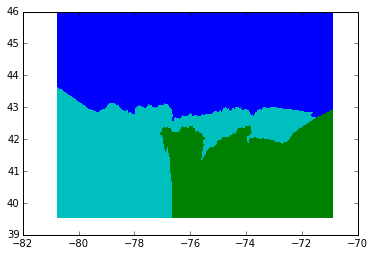

In [103]:
pl.figure()
pl.pcolormesh(xx, yy, Z,  cmap=light_colors)    # Invoke only one of the functions
pl.pcolormesh(xx, yy, Z1, cmap=light_colors)
pl.pcolormesh(xx, yy, Z2, cmap=light_colors)